# 线性回归

## 简单线性回归

In [3]:
import numpy as np
import matplotlib.pyplot as plt

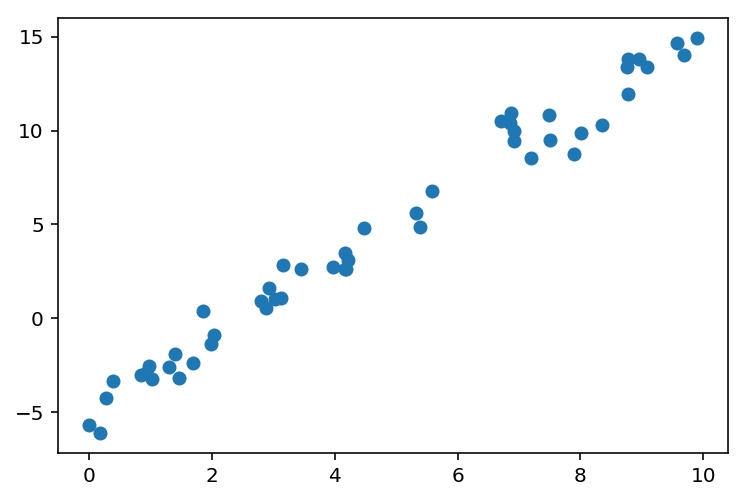

In [4]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)
# rng.randn(50) 表示噪声
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

# fit_intercept：是否有截据，如果没有则直线过原点。
# normalize：是否将数据归一化。

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

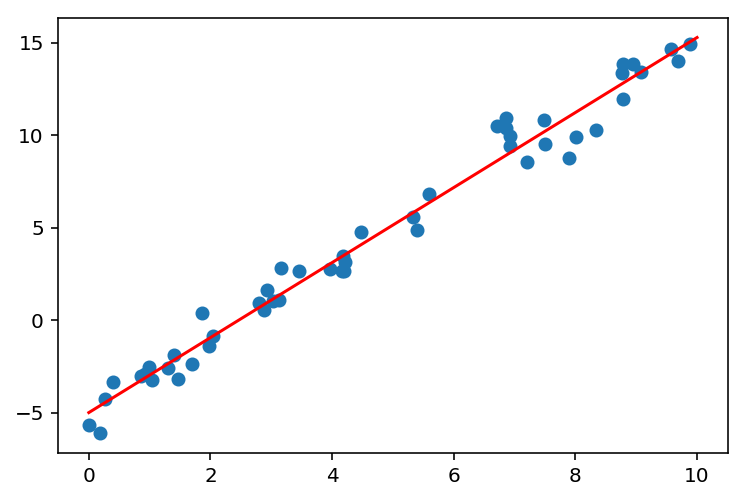

In [6]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
# 绘制原始点
plt.scatter(x, y)
# 绘制预测直线
plt.plot(xfit, yfit,c='r')
plt.show()

In [7]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


### 如果没有噪声，预测就非常准了

In [8]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


## 多项式回归

### 构造多项式特征

In [11]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, np.newaxis])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [12]:
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=True)
poly.fit_transform(x[:, np.newaxis])

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

### 管道 = 多项式特征 + 线性回归

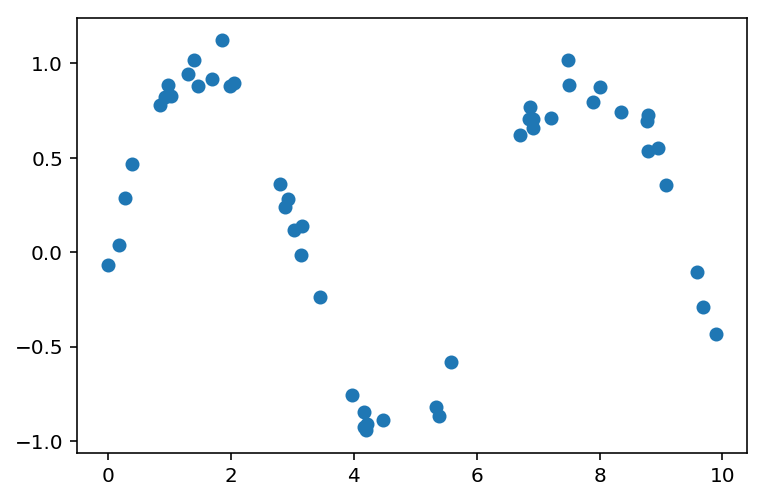

In [14]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)  # 加上一些噪音

plt.scatter(x, y)
plt.show()

### 7 阶多项式

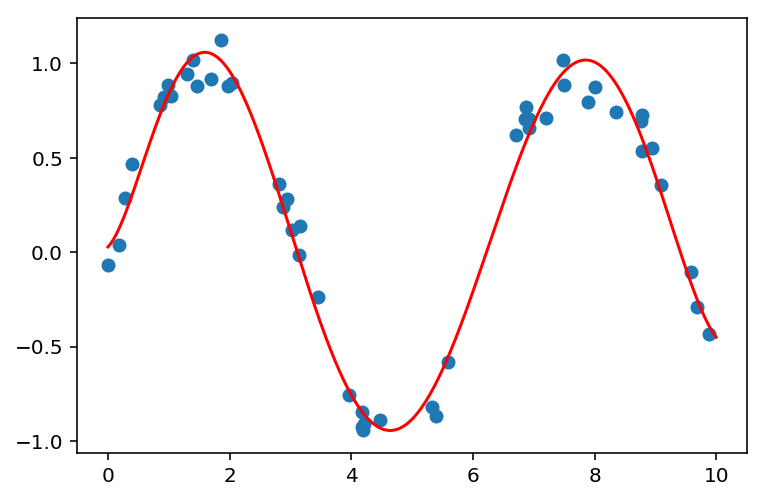

In [15]:
from sklearn.pipeline import make_pipeline

ploy_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
ploy_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = ploy_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
# 绘制拟合曲线
plt.plot(xfit, yfit, c='r')
# plt.xlim(0,10)
# plt.ylim(-2,2)
plt.show()

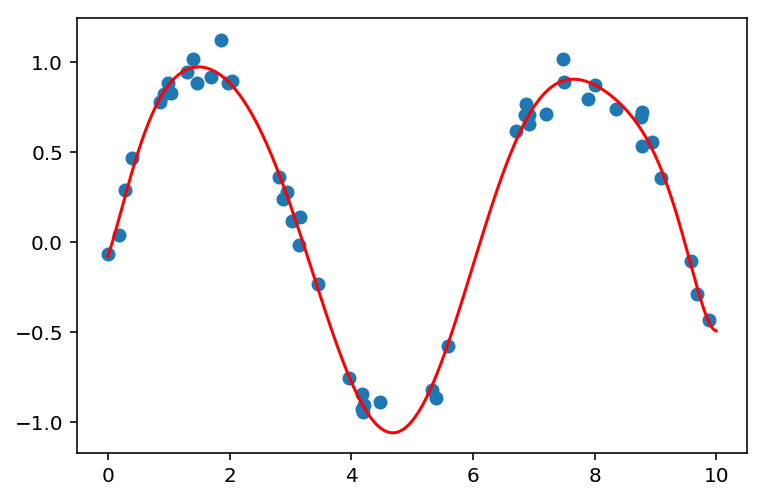

In [24]:
from sklearn.pipeline import make_pipeline

ploy_model = make_pipeline(PolynomialFeatures(10), LinearRegression())
ploy_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = ploy_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
# 绘制拟合曲线
plt.plot(xfit, yfit, c='r')
# plt.xlim(0,10)
# plt.ylim(-2,2)
plt.show()

```
import seaborn as sns;sns.set()
```